# Experiment 4
## 22 january
# Name:Tufan Kundu
# Reg no: 24MDT0184

## Q1. Today we will implement logistic regression to fit a model  in connection with the dataset ”liver patient.csv” available for  you to download in moodle.
 
 Download the dataset ’liver patient.csv’ from moodle. This dataset has information regarding
 whether a person has liver disease or not based on some medical paramerters(features) of a
 person. Open the CSV file and see the different features and the target variable Y also. 1
 specifies yes and 0 specifies no in this last column of your dataset, which gives information
 regarding whether the person has or not liver disease.

### Load the dataset to a dataframe.

In [115]:
import numpy as np 
import pandas as pd
df = pd.read_csv(r"D:\study material\VIT_Data_Science\Winter_Sem\Data Mining and Machine Learning Lab\Class_notes\ML_exp4\liver_patient.csv")
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [116]:
df['liver_disease'].value_counts()

liver_disease
1    416
0    167
Name: count, dtype: int64

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  liver_disease               583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


### Drop the ’Age’,’Gender’ columns in your dataframe

In [118]:
df.drop(['Age','Gender'],axis=1,inplace = True)
df

,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease
0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...
578,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,1.3,0.5,184,29,32,6.8,3.4,1.00,1


### USe MinMaxScaler() to scale the data in the range of 0 to 1

In [119]:
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()
x = MM.fit_transform(df)

### Split the data into training and testing sets using appropriate  functions. Use a 80:20 split and prepare your x train,x test,y train,y test data.

In [120]:
X = x[:,:-1]
Y = x[:,-1]

In [121]:
X.shape

(583, 8)

In [122]:
Y.shape

(583,)

In [123]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

### Now, import the inbuilt LogisticRegression class  and create an object of this class and fit the model  using training data as you have done in the linear  and multiple linear regression case like last lab

In [124]:
from sklearn.linear_model import LogisticRegression
logisticR = LogisticRegression()
logisticR.fit(x_train,y_train)
y_pred = logisticR.predict(x_test)

In [125]:
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(y_test,y_pred)*100
print("Accuracy score of the model is:",accuracy1 ,"%")

Accuracy score of the model is: 74.35897435897436 %


### Q2. Since its difficult to visualize the decision boundary in the above case we will take case where we will generate some dummy data with three features and the respective classes and implement logistic regression and visualize the decision boundary

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [22]:
# generating a fake data first
x, y = make_classification(
    n_samples=200, # total numner of samples in the dataset
    n_features=3, #total number of features in each sample
    n_informative=3, #number of informative features relevant for classification
    n_redundant=0, #cane be used for generating new features as linear combinition 
    n_clusters_per_class=1, # number of cluster per class
    class_sep = 3, #seperation between classes higher means easier classification
    random_state=42)

Accuracy score: 100.0 %
Coefficients: [ 2.17203369  0.19178324 -0.5114248 ]
Intercept: 3.3230582995486557


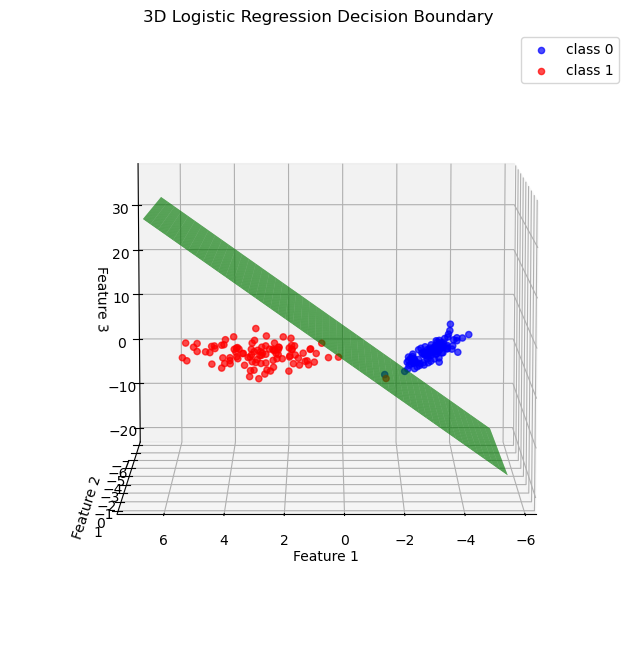

In [23]:
# Splitting the data into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Train the logistic regression model
logisticR = LogisticRegression()
logisticR.fit(x_train, y_train)

# Predict and calculate accuracy
y_pred = logisticR.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:", accuracy * 100, "%")

# Get the model coefficients and intercept
coef = logisticR.coef_[0]
intercept = logisticR.intercept_[0]
print("Coefficients:", coef)
print("Intercept:", intercept)

# Create a 3D plot for the decision boundary
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the datapoints
ax.scatter(x[y == 0, 0], x[y == 0, 1], x[y == 0, 2], color='blue', label='class 0', alpha=0.7)
ax.scatter(x[y == 1, 0], x[y == 1, 1], x[y == 1, 2], color='red', label='class 1', alpha=0.7)

# Create a grid for decision boundary
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))

# Calculate the z value (decision boundary plane)
zz = -(coef[0] * xx + coef[1] * yy + intercept) / coef[2]

# Plot the decision boundary plane
ax.plot_surface(xx, yy, zz, color='green', alpha=0.8, edgecolor='none')

# Set plot labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title("3D Logistic Regression Decision Boundary")
ax.legend()
ax.view_init(elev=8, azim=90)

# Show the plot
plt.show()


### Q3. Now use any two features (except the age and gender) from the liver patient.csv dataset and implement logistic regression to predict whether a person has liver disease or not and in this case find the accuracy of the model and plot the decision boundary

In [24]:
df = pd.read_csv(r"D:\study material\VIT_Data_Science\Winter_Sem\Data Mining and Machine Learning Lab\Class_notes\ML_exp4\liver_patient.csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [25]:
df.drop(['Age','Gender'],axis=1,inplace = True)

### We randomly select 2 features and check its accuracy

In [95]:
features = df.columns[:-1] 
selected_features = np.random.choice(features, 2, replace=False)  
print("Selected features:", selected_features)

Selected features: ['Alamine_Aminotransferase' 'Albumin']


In [96]:
x = df[selected_features]

In [97]:
x

,Alamine_Aminotransferase,Albumin
0,16,3.3
1,64,3.2
2,60,3.3
3,14,3.4
4,27,2.4
...,...,...
578,20,1.6
579,35,3.2
580,48,3.2
581,29,3.4


In [98]:
y = df['liver_disease']

In [99]:
y

0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: liver_disease, Length: 583, dtype: int64

In [100]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [101]:
from sklearn.linear_model import LogisticRegression
logisticR = LogisticRegression()
logisticR.fit(x_train,y_train)
y_pred = logisticR.predict(x_test)
from sklearn.metrics import accuracy_score
print("Accuracy score of the model is:", accuracy_score(y_test,y_pred)*100,"%")

Accuracy score of the model is: 76.92307692307693 %


### Q4. Using the liver patient.csv dataset, drop the features age and gender in that dataframe  and write down a gradient descent algorithm to implement the same. find the predictions of your model and the accuracy of the same. compare with Q1 results

In [126]:
df = pd.read_csv(r"D:\study material\VIT_Data_Science\Winter_Sem\Data Mining and Machine Learning Lab\Class_notes\ML_exp4\liver_patient.csv")
df.drop(['Age','Gender'],axis=1,inplace = True)

In [130]:
X = df.drop(columns=['liver_disease']).values
y = df['liver_disease'].values

#scaling to the range of 0 and 1
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X = np.c_[np.ones(X.shape[0]), X] 

# Split the data into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient Descent function
def gradient_descent(X, y, parameters, alpha, iterations):
    m = len(y)  
    for i in range(iterations):
        predictions = sigmoid(X @ parameters) 
        error = predictions - y  # (h(x) - y)
        gradients = (1 / m) * (X.T @ error) 
        # Update the parameters
        parameters -= alpha * gradients  
    return parameters

# Initialize parameters  with zeros
parameters = np.zeros(X_train.shape[1])

# Setting learning rate (alpha) and number of iterations
alpha = 0.01
iterations = 1000

# Perform gradient descent
parameters = gradient_descent(X_train, y_train, parameters, alpha, iterations)

# Final model parameters
print("Optimized parameters:", parameters)

# Predict function
def predict(X, parameters):
    predictions = sigmoid(X @ parameters)
    return [1 if p >= 0.5 else 0 for p in predictions] 

# Predict on the test set
y_pred = predict(X_test, parameters)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy through gradient descent algorithm: {accuracy * 100}%")
print(f"Accuracy in Q1(through sklearn logistic regression):{accuracy1}%")

Optimized parameters: [0.5549485  0.10303017 0.1923647  0.1585347  0.09027214 0.05447359
 0.27471853 0.13911428 0.05708392]
Accuracy through gradient descent algorithm: 74.35897435897436%
Accuracy in Q1(through sklearn logistic regression):74.35897435897436%
